# Build RFID scanner for Blockchain

[written in markdown](https://daringfireball.net/projects/markdown/syntax)

[Send RFID tag data to the EOS blockchain for novel supply chain, manufacturing, tracking and access control applications.](https://www.hackster.io/firmwareguru/build-an-rfid-scanner-for-blockchain-1fbdb3?f=1)

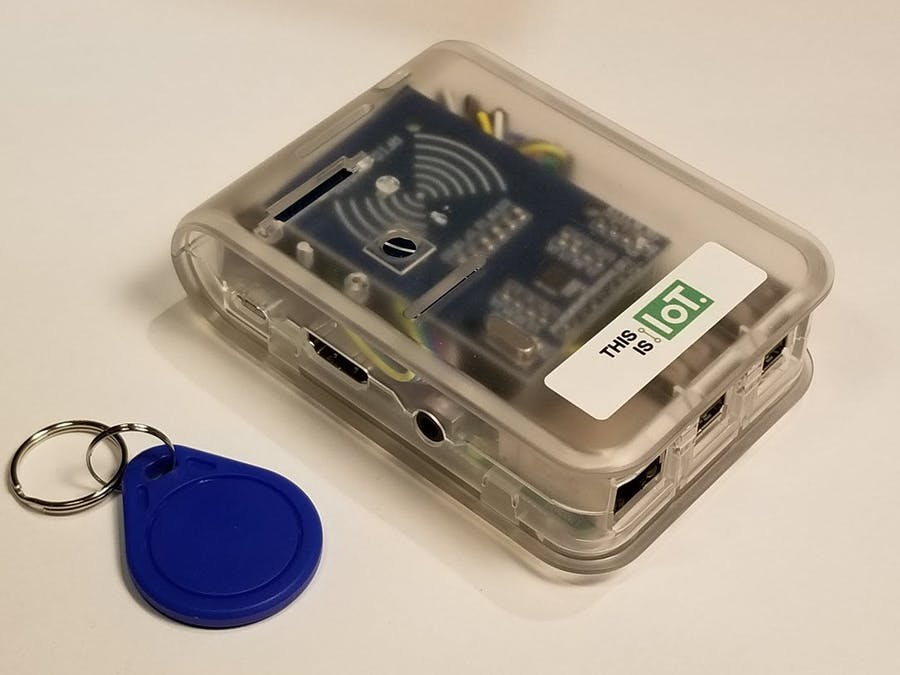

## Things used in this project

### Hardware components
- [Raspberry](https://www.hackster.io/raspberry-pi/products/raspberry-pi-3-model-b?ref=project-06791b) Pi 2 or 3

- [Micro SD Card](https://go.pimylifeup.com/DUVENo/amazon/microsdcard) or a [SD card](https://go.pimylifeup.com/LmAkjt/amazon/sdcard) if you’re using an old version of the Pi.

- [Power Supply](https://go.pimylifeup.com/TwjJnF/amazon/powersupply)

- [MFRC522](https://nl.aliexpress.com/item/32793688481.html?spm=a2g0s.8937460.0.0.1c262e0ei19TSp)

- Ethernet Cable or WiFi Dongle (The Pi 3 has WiFi inbuilt)

### Software apps and online services

- [EOS Blockchain](https://eos.io/)

# Story
## Introduction

Take your RFID tracking applications and ideas to a new level by sending the scanned tag data to a global, decentralized and distributed cloud platform.

This project uses a Raspberry Pi as an IoT device and the [EOS blockchain](https://eos.io/) as the global distributed platform.

The IoT device scans RFID chips in keycards, fobs, patches, tags, etc. The tags can be used to uniquely identify the items they are attached to in order to provide proof of location and time in supply chain, manufacturing, asset tracking and access control applications.

Everything you need to build this open source scanner and to access your scanned tag data on the blockchain is provided, including the [node.js](https://nodejs.org/en/) software, pre-deployed smart contract/dApp, blockchain account and private key. A simple [web-application](https://eosiot.github.io/rfid-html/) is available to facilitate real-time demonstration of end-to-end scanning, transacting and retrieving of real IoT data on a blockchain.

**Update:** The scanner device obtains its current location on Planet Earth with a crude IP geolocation lookup at the start of the application. The location is geohashed and combined with the scanned tag data into a data record. The location of the scanned tag, along with the tag data, is viewable on a map in the rfid-html web application.

Instructions to build the device and to use the platform are provided in the next section.

### EOS Blockchain

EOS was selected for the project because it offers these key features:

- EOS offers fast transaction times: a scanned tag appears on-chain within 2 seconds typical.
- EOS has no transaction fees. The blockchain resources are purchased up-front and one-time only. The IoT device can then transact within allocated resources without incurring additional fees.
- EOS transactions are efficiently packed binary structures minimizing bandwidth requirements.
- EOS uses the same globally recognized and hardened security standard as other blockchains like [Bitcoin](https://bitcoin.org/en/) and [Ethereum](https://ethereum.org/en/).

Briefly, you'll connect the MFRC522 RFID chip/antenna board and buzzer to the Pi's expansion header, download our [device software repository](https://github.com/EOSIoT/rfid-scanner-node) to a directory on your Pi.

Run `npm install`, and then `sudo node rfid-scanner-eos-rpi.js`. Place tags within 2 cm of the antenna and view the [webpage](https://eosiot.github.io/rfid-html/) to see the scanned tag UID appear with seconds.

The [EOS Jungle2.0 Testnet](https://jungletestnet.io/) hosts the dApp and device account.




## Hardware Setup

This project assumes you've already got a Raspberry Pi up and running. If you need get a Pi up from scratch, then there are many great resources out there like [this one](https://projects.raspberrypi.org/en/projects/raspberry-pi-setting-up).

You'll need:

- Rpi 2 or 3 (3+ used in this project)
- MFRC522 RFID scanner. I used this one: https://www.amazon.com/Gikfun-Sensor-Module-Arduino-EK1112x2/dp/B07FC99DJS
- Active buzzer. These are simple two-wire tone-generators, like this.
- Some wire, and maybe some soldering skillz.

It might look like this:

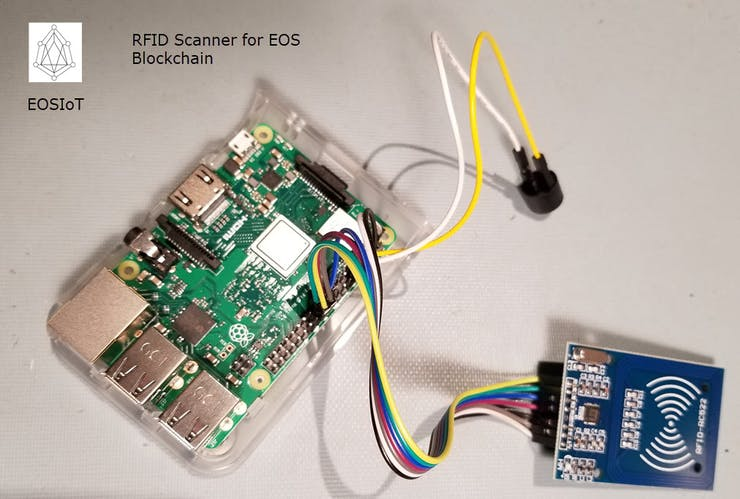

Hook it up like this:

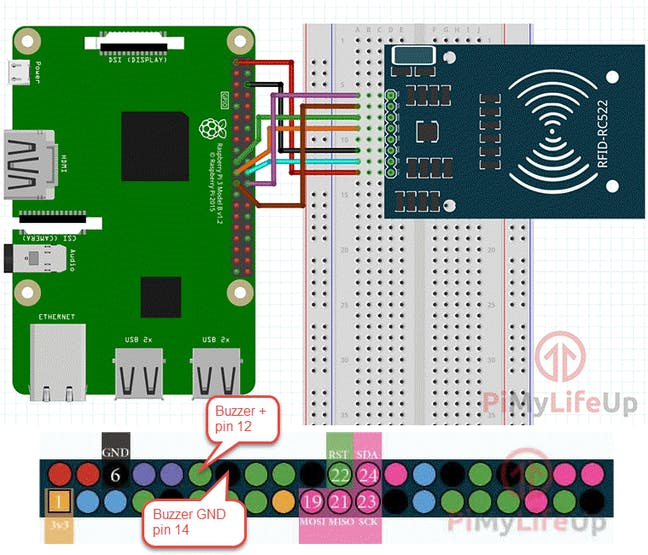

There's a great write-up [here](https://pimylifeup.com/raspberry-pi-rfid-rc522/) if you want to know more about how the MFRC522 can be used with the Pi.

## Software setup

- Latest Raspbian OS (Project worked on a release download as of April 2019)
- Recent Node.js. The version (8.11.1) that comes with Raspbian works.
- NPM package manager. Install it then update it:
- `sudo apt-get install npm`
- `sudo npm i -g npm`
- Git (already installed)

## Setup

Clone this repository onto your Pi:

- `$ git clone 'https://github.com/EOSIoT/rfid-scanner-node.git`

- `$ cd rfid-scanner-node`

Install project dependencies:

- `$ npm install`

That should be it for the software.

The private key to sign transactions to the EOS blockchain dApp is already encoded in the software. Don't think you can hack the IoT device account though. Through EOS' flexible permission management system, a custom permission was created just for the task of submitting RFID data.

## Using

Run the application with super-user privileges. Take note of the unique device ID to reference the scanner's data in the [demo web application](http://eosiot.io/rfid). In the example below, the device ID is 942140182. Write this down as you'll need it to filter for your scanner's data in the web application.

If the application was setup correctly, you will see the results of an initial blockchain *info* request, showing that communication with the designated EOS API endpoint is working.

Example:

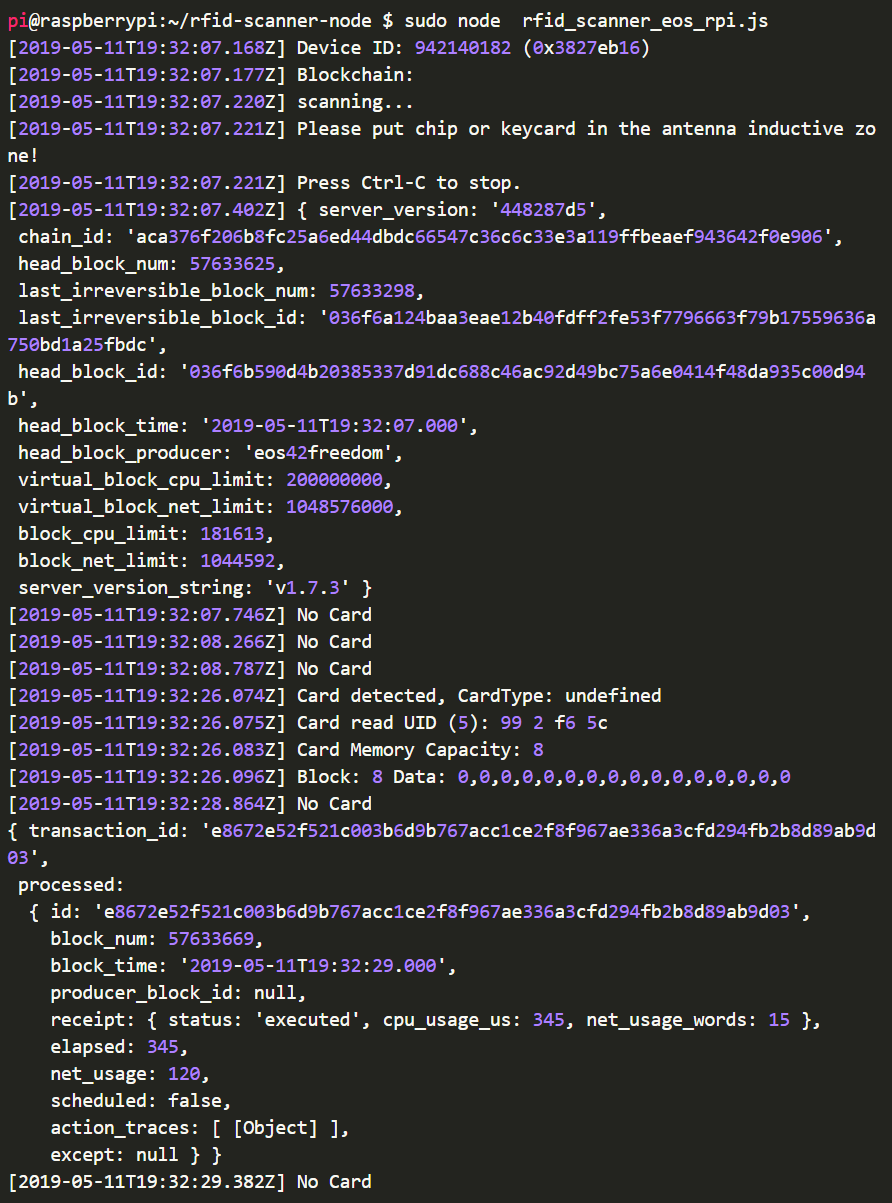

To scan a card or tag, place it near (within 2 cm) the mfrc522 reader's top (antenna) side. You'll hear a beep sound from the buzzer confirming the scan. The tag's UID and the current time on the RPi IoT device is then bundled up into a transaction and sent to the EOS blockchain where it is quickly absorbed into a block.

The RFID scanner software has a private key enabling it to submit tag data on behalf of the `eosiot11node` account. The tag's UID data is placed into a database hosted by a smart contract (dApp) under the `eosiot12rfid` account.

The dApp is currently hosted on the [Jungle 2.0 Testnet](https://monitor.jungletestnet.io/) until the mainnet solves the CPU crunch problem.

The data generated by the RFID scanner is accessed via simple [REST API calls](https://developers.eos.io/eosio-nodeos/reference) or a [javascript library](https://github.com/EOSIO/eosjs). There is a simple [web application](https://eosiot.github.io/rfid-html/) I've written that you can use to see the scanned tag data appear on the EOS blockchain in near real-time. Go ahead and enter the device ID you see above to view the data posted while testing the project.

Screenshot of the rfid-html web application:

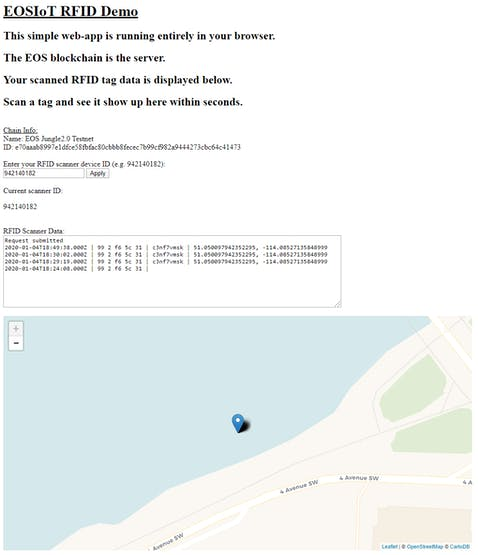

## Conclusion

With the open-source software script and installer, and existing blockchain infrastructure, you can quickly deploy an RFID scanner prototype to test your assumptions and ideas around how you could leverage blockchain for your next project.

The blockchain account I've created for this project (eosiot11node) is obviously shared between every IoT device that uses the software. There is a limited amount of bandwidth and CPU allocated to it, and with enough users the daily limits will be reached.

If you want device account(s) created for your own device, I can help with that. Send me a message.

Interesting times we live in.

# Code

- licence
- README.md
- npm-shrinkwrap.json
- package.json
- rfid_scanner_eos_rpi.js